In [710]:
import numpy as np
import pandas as pd
import seaborn as sns
import io
import os
from google.colab import drive
from statsmodels.datasets import get_rdataset
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#Data CleanUp

In [711]:
Directory = '/content/drive/My Drive/CSV'
drive.mount('/content/drive')
csv_file = os.path.join(Directory,  'air-pollution.csv')
if os.path.exists(csv_file):
  initial_air_pollution_df = pd.read_csv(csv_file)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [712]:
initial_air_pollution_df.head()

,Entity,Code,Year,Nitrogen oxide (NOx),Sulphur dioxide (SO₂) emissions,Carbon monoxide (CO) emissions,Organic carbon (OC) emissions,Non-methane volatile organic compounds (NMVOC) emissions,Black carbon (BC) emissions,Ammonia (NH₃) emissions
0,Afghanistan,AFG,1750,555.47860,174.87167,142073.31,5456.8850,13596.633,1633.0308,7681.0464
1,Afghanistan,AFG,1760,578.50757,181.99332,147859.23,5679.1167,14150.870,1699.5359,8000.8574
2,Afghanistan,AFG,1770,602.47980,189.38850,153867.40,5909.8840,14726.470,1768.5956,8333.9610
3,Afghanistan,AFG,1780,627.43220,197.06535,160104.42,6149.4410,15324.077,1840.2854,8680.9060
4,Afghanistan,AFG,1790,653.40310,205.03189,166576.77,6398.0370,15944.332,1914.6805,9042.2660


In [713]:
air_pollution_df = initial_air_pollution_df[(initial_air_pollution_df['Year'] >= 1960) & (initial_air_pollution_df['Year'] <= 2022)]

In [714]:
air_pollution_df.head()

,Entity,Code,Year,Nitrogen oxide (NOx),Sulphur dioxide (SO₂) emissions,Carbon monoxide (CO) emissions,Organic carbon (OC) emissions,Non-methane volatile organic compounds (NMVOC) emissions,Black carbon (BC) emissions,Ammonia (NH₃) emissions
165,Afghanistan,AFG,1960,69198.870,2085.2050,302123.40,12362.0850,85092.14,3770.6980,42092.555
166,Afghanistan,AFG,1961,74638.484,2352.8745,298024.50,12396.0840,90855.79,3791.6514,42172.020
167,Afghanistan,AFG,1962,91568.445,3063.7595,322188.22,12480.9375,109500.31,3845.2188,43215.242
168,Afghanistan,AFG,1963,98810.940,3153.3672,319572.25,12500.5740,117117.96,3847.2212,43928.008
169,Afghanistan,AFG,1964,119275.230,3732.0688,348701.20,12537.9540,139542.55,3874.8452,44673.980


In [715]:
Directory = '/content/drive/My Drive/CSV'
drive.mount('/content/drive')
csv_file = os.path.join(Directory,  'urban-population.csv')
if os.path.exists(csv_file):
  initial_urban_population_df = pd.read_csv(csv_file)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [716]:
initial_urban_population_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,Urban population,SP.URB.TOTL,27728.0,28330.0,28764.0,29157.0,29505.0,29802.0,...,44588.0,44943.0,45297.0,45648.0,45999.0,46351.0,46574.0,46734.0,46891.0,NaN
1,Africa Eastern and Southern,AFE,Urban population,SP.URB.TOTL,19033821.0,19872354.0,20770791.0,21737424.0,22773061.0,23870852.0,...,198073453.0,206556403.0,215083441.0,223732229.0,232922327.0,242451140.0,252315481.0,262377061.0,272666107.0,NaN
2,Afghanistan,AFG,Urban population,SP.URB.TOTL,724373.0,763336.0,805062.0,849446.0,896820.0,947332.0,...,8043935.0,8371880.0,8665979.0,8999963.0,9353296.0,9727157.0,10142913.0,10551772.0,10946834.0,NaN
3,Africa Western and Central,AFW,Urban population,SP.URB.TOTL,14301917.0,14986610.0,15707826.0,16480638.0,17302426.0,18177351.0,...,175773257.0,183117253.0,190684610.0,198494008.0,206492202.0,214684207.0,223107995.0,231704052.0,240494466.0,NaN
4,Angola,AGO,Urban population,SP.URB.TOTL,559023.0,587555.0,618618.0,650924.0,684074.0,717302.0,...,17017877.0,17845914.0,18702478.0,19586972.0,20488542.0,21410634.0,22338586.0,23276246.0,24229338.0,NaN


In [717]:
initial_urban_population_df = initial_urban_population_df.iloc[:, :-1]
initial_urban_population_df = initial_urban_population_df.drop(initial_urban_population_df.columns[[2, 3]], axis=1)

In [718]:
initial_urban_population_df.head()

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,27728.0,28330.0,28764.0,29157.0,29505.0,29802.0,30052.0,30160.0,...,44228.0,44588.0,44943.0,45297.0,45648.0,45999.0,46351.0,46574.0,46734.0,46891.0
1,Africa Eastern and Southern,AFE,19033821.0,19872354.0,20770791.0,21737424.0,22773061.0,23870852.0,25025740.0,26239326.0,...,190108778.0,198073453.0,206556403.0,215083441.0,223732229.0,232922327.0,242451140.0,252315481.0,262377061.0,272666107.0
2,Afghanistan,AFG,724373.0,763336.0,805062.0,849446.0,896820.0,947332.0,1001109.0,1058060.0,...,7687539.0,8043935.0,8371880.0,8665979.0,8999963.0,9353296.0,9727157.0,10142913.0,10551772.0,10946834.0
3,Africa Western and Central,AFW,14301917.0,14986610.0,15707826.0,16480638.0,17302426.0,18177351.0,19066154.0,20003782.0,...,168643432.0,175773257.0,183117253.0,190684610.0,198494008.0,206492202.0,214684207.0,223107995.0,231704052.0,240494466.0
4,Angola,AGO,559023.0,587555.0,618618.0,650924.0,684074.0,717302.0,750290.0,783275.0,...,16211664.0,17017877.0,17845914.0,18702478.0,19586972.0,20488542.0,21410634.0,22338586.0,23276246.0,24229338.0


In [719]:
urban_population_df = pd.melt(initial_urban_population_df,
                                     id_vars=['Country Name', 'Country Code'],
                                     var_name='Year',
                                     value_name='Urban Population')
urban_population_df = urban_population_df.sort_values(by=['Country Name', 'Year'])

In [720]:
urban_population_df.head()

,Country Name,Country Code,Year,Urban Population
2,Afghanistan,AFG,1960,724373.0
268,Afghanistan,AFG,1961,763336.0
534,Afghanistan,AFG,1962,805062.0
800,Afghanistan,AFG,1963,849446.0
1066,Afghanistan,AFG,1964,896820.0


In [721]:
air_pollution_df['Year'] = air_pollution_df['Year'].astype(str)
urban_population_df['Year'] = urban_population_df['Year'].astype(str)

merged_df = pd.merge(air_pollution_df, urban_population_df,
                     left_on=['Entity', 'Code', 'Year'],
                     right_on=['Country Name', 'Country Code', 'Year'],
                     how='inner')

merged_df.drop(['Country Name', 'Country Code'], axis=1, inplace=True)

<ipython-input-721-d2077c0085bb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  air_pollution_df['Year'] = air_pollution_df['Year'].astype(str)


In [722]:
merged_df.head()

,Entity,Code,Year,Nitrogen oxide (NOx),Sulphur dioxide (SO₂) emissions,Carbon monoxide (CO) emissions,Organic carbon (OC) emissions,Non-methane volatile organic compounds (NMVOC) emissions,Black carbon (BC) emissions,Ammonia (NH₃) emissions,Urban Population
0,Afghanistan,AFG,1960,69198.870,2085.2050,302123.40,12362.0850,85092.14,3770.6980,42092.555,724373.0
1,Afghanistan,AFG,1961,74638.484,2352.8745,298024.50,12396.0840,90855.79,3791.6514,42172.020,763336.0
2,Afghanistan,AFG,1962,91568.445,3063.7595,322188.22,12480.9375,109500.31,3845.2188,43215.242,805062.0
3,Afghanistan,AFG,1963,98810.940,3153.3672,319572.25,12500.5740,117117.96,3847.2212,43928.008,849446.0
4,Afghanistan,AFG,1964,119275.230,3732.0688,348701.20,12537.9540,139542.55,3874.8452,44673.980,896820.0


In [723]:
Directory = '/content/drive/My Drive/CSV'
drive.mount('/content/drive')
csv_file = os.path.join(Directory,  'rural-population.csv')
if os.path.exists(csv_file):
  initial_rural_population_df = pd.read_csv(csv_file)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [724]:
initial_rural_population_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,Rural population,SP.RUR.TOTL,26880.0,27481.0,27918.0,28318.0,28673.0,28980.0,...,59006.0,59314.0,59577.0,59791.0,59963.0,60091.0,60011.0,59803.0,59554.0,NaN
1,Africa Eastern and Southern,AFE,Rural population,SP.RUR.TOTL,111658758.0,114296883.0,117064799.0,119893122.0,122832934.0,125871499.0,...,385577648.0,393452021.0,401294164.0,409014341.0,416834821.0,424791846.0,432797498.0,440600045.0,448193025.0,NaN
2,Afghanistan,AFG,Rural population,SP.RUR.TOTL,7898093.0,8026804.0,8163985.0,8308019.0,8458694.0,8617815.0,...,24672275.0,25381619.0,25970228.0,26643455.0,27333488.0,28042342.0,28829317.0,29547690.0,30181937.0,NaN
3,Africa Western and Central,AFW,Rural population,SP.RUR.TOTL,82954373.0,84327418.0,85737206.0,87186879.0,88657553.0,90158852.0,...,222082250.0,225573122.0,229093774.0,232644696.0,236154623.0,239621856.0,243081107.0,246481855.0,249836404.0,NaN
4,Angola,AGO,Rural population,SP.RUR.TOTL,4798172.0,4853778.0,4902782.0,4948903.0,4989125.0,5019280.0,...,10110460.0,10281807.0,10452268.0,10621656.0,10784991.0,10942954.0,11089900.0,11227528.0,11359649.0,NaN


In [725]:
initial_rural_population_df = initial_rural_population_df.iloc[:, :-1]
initial_rural_population_df = initial_rural_population_df.drop(initial_rural_population_df.columns[[2, 3]], axis=1)

In [726]:
initial_rural_population_df.head()

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,26880.0,27481.0,27918.0,28318.0,28673.0,28980.0,29239.0,29362.0,...,58652.0,59006.0,59314.0,59577.0,59791.0,59963.0,60091.0,60011.0,59803.0,59554.0
1,Africa Eastern and Southern,AFE,111658758.0,114296883.0,117064799.0,119893122.0,122832934.0,125871499.0,128929776.0,132073909.0,...,377783371.0,385577648.0,393452021.0,401294164.0,409014341.0,416834821.0,424791846.0,432797498.0,440600045.0,448193025.0
2,Afghanistan,AFG,7898093.0,8026804.0,8163985.0,8308019.0,8458694.0,8617815.0,8782038.0,8951970.0,...,23853670.0,24672275.0,25381619.0,25970228.0,26643455.0,27333488.0,28042342.0,28829317.0,29547690.0,30181937.0
3,Africa Western and Central,AFW,82954373.0,84327418.0,85737206.0,87186879.0,88657553.0,90158852.0,91732332.0,93316168.0,...,218561121.0,222082250.0,225573122.0,229093774.0,232644696.0,236154623.0,239621856.0,243081107.0,246481855.0,249836404.0
4,Angola,AGO,4798172.0,4853778.0,4902782.0,4948903.0,4989125.0,5019280.0,5036754.0,5044228.0,...,9935338.0,10110460.0,10281807.0,10452268.0,10621656.0,10784991.0,10942954.0,11089900.0,11227528.0,11359649.0


In [727]:
rural_population_df = pd.melt(initial_rural_population_df,
                                     id_vars=['Country Name', 'Country Code'],
                                     var_name='Year',
                                     value_name='Rural Population')

rural_population_df = rural_population_df.sort_values(by=['Country Name', 'Year'])

In [728]:
rural_population_df.head()

,Country Name,Country Code,Year,Rural Population
2,Afghanistan,AFG,1960,7898093.0
268,Afghanistan,AFG,1961,8026804.0
534,Afghanistan,AFG,1962,8163985.0
800,Afghanistan,AFG,1963,8308019.0
1066,Afghanistan,AFG,1964,8458694.0


In [729]:
rural_population_df['Year'] = rural_population_df['Year'].astype(str)

merged_df_1 = pd.merge(merged_df, rural_population_df,
                     left_on=['Entity', 'Code', 'Year'],
                     right_on=['Country Name', 'Country Code', 'Year'],
                     how='inner')

merged_df_1.drop(['Country Name', 'Country Code'], axis=1, inplace=True)

In [730]:
merged_df_1.head()

,Entity,Code,Year,Nitrogen oxide (NOx),Sulphur dioxide (SO₂) emissions,Carbon monoxide (CO) emissions,Organic carbon (OC) emissions,Non-methane volatile organic compounds (NMVOC) emissions,Black carbon (BC) emissions,Ammonia (NH₃) emissions,Urban Population,Rural Population
0,Afghanistan,AFG,1960,69198.870,2085.2050,302123.40,12362.0850,85092.14,3770.6980,42092.555,724373.0,7898093.0
1,Afghanistan,AFG,1961,74638.484,2352.8745,298024.50,12396.0840,90855.79,3791.6514,42172.020,763336.0,8026804.0
2,Afghanistan,AFG,1962,91568.445,3063.7595,322188.22,12480.9375,109500.31,3845.2188,43215.242,805062.0,8163985.0
3,Afghanistan,AFG,1963,98810.940,3153.3672,319572.25,12500.5740,117117.96,3847.2212,43928.008,849446.0,8308019.0
4,Afghanistan,AFG,1964,119275.230,3732.0688,348701.20,12537.9540,139542.55,3874.8452,44673.980,896820.0,8458694.0


In [731]:
Directory = '/content/drive/My Drive/CSV'
drive.mount('/content/drive')
csv_file = os.path.join(Directory,  'total-population.csv')
if os.path.exists(csv_file):
  initial_total_population_df = pd.read_csv(csv_file)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [732]:
initial_total_population_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,...,103594.0,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0,106537.0,106445.0,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,...,583651101.0,600008424.0,616377605.0,632746570.0,649757148.0,667242986.0,685112979.0,702977106.0,720859132.0,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,...,32716210.0,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0,40099462.0,41128771.0,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97256290.0,99314028.0,101445032.0,103667517.0,105959979.0,108336203.0,...,397855507.0,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0,466189102.0,478185907.0,490330870.0,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5357195.0,5441333.0,5521400.0,5599827.0,5673199.0,5736582.0,...,27128337.0,28127721.0,29154746.0,30208628.0,31273533.0,32353588.0,33428486.0,34503774.0,35588987.0,NaN


In [733]:
initial_total_population_df = initial_total_population_df.iloc[:, :-1]
initial_total_population_df = initial_total_population_df.drop(initial_total_population_df.columns[[2, 3]], axis=1)

In [734]:
initial_total_population_df.head()

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,59291.0,59522.0,...,102880.0,103594.0,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0,106537.0,106445.0
1,Africa Eastern and Southern,AFE,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,153955516.0,158313235.0,...,567892149.0,583651101.0,600008424.0,616377605.0,632746570.0,649757148.0,667242986.0,685112979.0,702977106.0,720859132.0
2,Afghanistan,AFG,8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,9783147.0,10010030.0,...,31541209.0,32716210.0,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0,40099462.0,41128771.0
3,Africa Western and Central,AFW,97256290.0,99314028.0,101445032.0,103667517.0,105959979.0,108336203.0,110798486.0,113319950.0,...,387204553.0,397855507.0,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0,466189102.0,478185907.0,490330870.0
4,Angola,AGO,5357195.0,5441333.0,5521400.0,5599827.0,5673199.0,5736582.0,5787044.0,5827503.0,...,26147002.0,27128337.0,28127721.0,29154746.0,30208628.0,31273533.0,32353588.0,33428486.0,34503774.0,35588987.0


In [735]:
total_population_df = pd.melt(initial_total_population_df,
                                     id_vars=['Country Name', 'Country Code'],
                                     var_name='Year',
                                     value_name='Total Population')
total_population_df = total_population_df.sort_values(by=['Country Name', 'Year'])

In [736]:
total_population_df.head()

,Country Name,Country Code,Year,Total Population
2,Afghanistan,AFG,1960,8622466.0
268,Afghanistan,AFG,1961,8790140.0
534,Afghanistan,AFG,1962,8969047.0
800,Afghanistan,AFG,1963,9157465.0
1066,Afghanistan,AFG,1964,9355514.0


In [737]:
total_population_df['Year'] = total_population_df['Year'].astype(str)

merged_df_2 = pd.merge(merged_df_1, total_population_df,
                     left_on=['Entity', 'Code', 'Year'],
                     right_on=['Country Name', 'Country Code', 'Year'],
                     how='inner')

merged_df_2.drop(['Country Name', 'Country Code'], axis=1, inplace=True)

In [738]:
merged_df_2.head()

,Entity,Code,Year,Nitrogen oxide (NOx),Sulphur dioxide (SO₂) emissions,Carbon monoxide (CO) emissions,Organic carbon (OC) emissions,Non-methane volatile organic compounds (NMVOC) emissions,Black carbon (BC) emissions,Ammonia (NH₃) emissions,Urban Population,Rural Population,Total Population
0,Afghanistan,AFG,1960,69198.870,2085.2050,302123.40,12362.0850,85092.14,3770.6980,42092.555,724373.0,7898093.0,8622466.0
1,Afghanistan,AFG,1961,74638.484,2352.8745,298024.50,12396.0840,90855.79,3791.6514,42172.020,763336.0,8026804.0,8790140.0
2,Afghanistan,AFG,1962,91568.445,3063.7595,322188.22,12480.9375,109500.31,3845.2188,43215.242,805062.0,8163985.0,8969047.0
3,Afghanistan,AFG,1963,98810.940,3153.3672,319572.25,12500.5740,117117.96,3847.2212,43928.008,849446.0,8308019.0,9157465.0
4,Afghanistan,AFG,1964,119275.230,3732.0688,348701.20,12537.9540,139542.55,3874.8452,44673.980,896820.0,8458694.0,9355514.0


In [739]:
merged_df_2.shape

(11277, 13)

In [740]:
final_merged_df = merged_df_2.dropna()

In [741]:
final_merged_df.shape

(11277, 13)

In [742]:
final_merged_df.head()

,Entity,Code,Year,Nitrogen oxide (NOx),Sulphur dioxide (SO₂) emissions,Carbon monoxide (CO) emissions,Organic carbon (OC) emissions,Non-methane volatile organic compounds (NMVOC) emissions,Black carbon (BC) emissions,Ammonia (NH₃) emissions,Urban Population,Rural Population,Total Population
0,Afghanistan,AFG,1960,69198.870,2085.2050,302123.40,12362.0850,85092.14,3770.6980,42092.555,724373.0,7898093.0,8622466.0
1,Afghanistan,AFG,1961,74638.484,2352.8745,298024.50,12396.0840,90855.79,3791.6514,42172.020,763336.0,8026804.0,8790140.0
2,Afghanistan,AFG,1962,91568.445,3063.7595,322188.22,12480.9375,109500.31,3845.2188,43215.242,805062.0,8163985.0,8969047.0
3,Afghanistan,AFG,1963,98810.940,3153.3672,319572.25,12500.5740,117117.96,3847.2212,43928.008,849446.0,8308019.0,9157465.0
4,Afghanistan,AFG,1964,119275.230,3732.0688,348701.20,12537.9540,139542.55,3874.8452,44673.980,896820.0,8458694.0,9355514.0


In [743]:
final_merged_df.describe()

,Nitrogen oxide (NOx),Sulphur dioxide (SO₂) emissions,Carbon monoxide (CO) emissions,Organic carbon (OC) emissions,Non-methane volatile organic compounds (NMVOC) emissions,Black carbon (BC) emissions,Ammonia (NH₃) emissions,Urban Population,Rural Population,Total Population
count,1.127700e+04,1.127700e+04,1.127700e+04,1.127700e+04,1.127700e+04,1.127700e+04,1.127700e+04,1.127700e+04,1.127700e+04,1.127700e+04
mean,4.269193e+05,5.116283e+05,2.640091e+06,5.594818e+04,5.709467e+05,2.455296e+04,2.290705e+05,1.209874e+07,1.485911e+07,2.695785e+07
std,1.987352e+06,2.168453e+06,1.472774e+07,2.121402e+05,2.341575e+06,1.103289e+05,9.442450e+05,4.540249e+07,7.478669e+07,1.137867e+08
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.600000e+02,0.000000e+00,2.646000e+03
25%,9.238666e+03,3.507927e+03,5.498026e+04,1.734425e+03,1.586467e+04,7.782246e+02,5.782151e+03,3.047920e+05,3.665720e+05,8.342150e+05
50%,4.138257e+04,2.533388e+04,2.885990e+05,1.070816e+04,8.821911e+04,4.092358e+03,3.635863e+04,1.920549e+06,2.065228e+06,4.623291e+06
75%,1.836213e+05,1.800592e+05,9.581444e+05,3.410757e+04,2.989485e+05,1.360401e+04,1.129845e+05,6.733350e+06,7.180774e+06,1.349102e+07
max,3.071117e+07,3.778001e+07,2.152620e+08,2.664139e+06,3.136735e+07,1.921052e+06,1.256013e+07,8.975784e+08,9.093848e+08,1.417173e+09


In [744]:
len(final_merged_df['Code'].unique())

179

In [745]:
df_2022 = final_merged_df[final_merged_df['Year'] == '2022']
df_sorted = df_2022.sort_values(by='Total Population', ascending=False)
top_100_codes = df_sorted.head(100)['Code']
print(top_100_codes.tolist())

['IND', 'CHN', 'USA', 'IDN', 'PAK', 'NGA', 'BRA', 'BGD', 'MEX', 'JPN', 'ETH', 'PHL', 'DEU', 'THA', 'FRA', 'GBR', 'TZA', 'ZAF', 'ITA', 'MMR', 'KEN', 'COL', 'ESP', 'UGA', 'SDN', 'ARG', 'DZA', 'IRQ', 'AFG', 'CAN', 'UKR', 'MAR', 'POL', 'SAU', 'UZB', 'AGO', 'PER', 'MYS', 'GHA', 'MOZ', 'NPL', 'MDG', 'CIV', 'CMR', 'NER', 'AUS', 'BFA', 'MLI', 'LKA', 'MWI', 'ZMB', 'KAZ', 'CHL', 'ROU', 'ECU', 'TCD', 'NLD', 'SOM', 'GTM', 'SEN', 'KHM', 'ZWE', 'GIN', 'RWA', 'BEN', 'BDI', 'TUN', 'BOL', 'BEL', 'HTI', 'JOR', 'DOM', 'CUB', 'SSD', 'CZE', 'SWE', 'HND', 'GRC', 'PRT', 'PNG', 'AZE', 'TJK', 'HUN', 'ISR', 'ARE', 'BLR', 'AUT', 'TGO', 'CHE', 'SLE', 'NIC', 'LBY', 'PRY', 'SRB', 'BGR', 'TKM', 'SLV', 'DNK', 'SGP', 'CAF']


In [746]:
top_100_codes = top_100_codes.tolist() if not isinstance(top_100_codes, list) else top_100_codes
aggregated_df = final_merged_df[final_merged_df['Code'].isin(top_100_codes)]
aggregated_df


,Entity,Code,Year,Nitrogen oxide (NOx),Sulphur dioxide (SO₂) emissions,Carbon monoxide (CO) emissions,Organic carbon (OC) emissions,Non-methane volatile organic compounds (NMVOC) emissions,Black carbon (BC) emissions,Ammonia (NH₃) emissions,Urban Population,Rural Population,Total Population
0,Afghanistan,AFG,1960,69198.870,2085.2050,302123.40,12362.0850,85092.14,3770.6980,42092.555,724373.0,7898093.0,8622466.0
1,Afghanistan,AFG,1961,74638.484,2352.8745,298024.50,12396.0840,90855.79,3791.6514,42172.020,763336.0,8026804.0,8790140.0
2,Afghanistan,AFG,1962,91568.445,3063.7595,322188.22,12480.9375,109500.31,3845.2188,43215.242,805062.0,8163985.0,8969047.0
3,Afghanistan,AFG,1963,98810.940,3153.3672,319572.25,12500.5740,117117.96,3847.2212,43928.008,849446.0,8308019.0,9157465.0
4,Afghanistan,AFG,1964,119275.230,3732.0688,348701.20,12537.9540,139542.55,3874.8452,44673.980,896820.0,8458694.0,9355514.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11272,Zimbabwe,ZWE,2018,82210.490,56748.1840,1557296.50,111642.5100,291050.40,32050.9020,124543.016,4848158.0,10204026.0,15052184.0
11273,Zimbabwe,ZWE,2019,79547.030,53065.8750,1574731.90,113660.8600,294380.62,32552.8750,127205.270,4945719.0,10408889.0,15354608.0
11274,Zimbabwe,ZWE,2020,68338.914,43894.0600,1593834.00,115329.2340,298699.94,32467.2950,129910.930,5052214.0,10617452.0,15669666.0
11275,Zimbabwe,ZWE,2021,71148.930,45291.4180,1624286.00,117177.1950,304488.38,33174.6050,132651.480,5166388.0,10827136.0,15993524.0


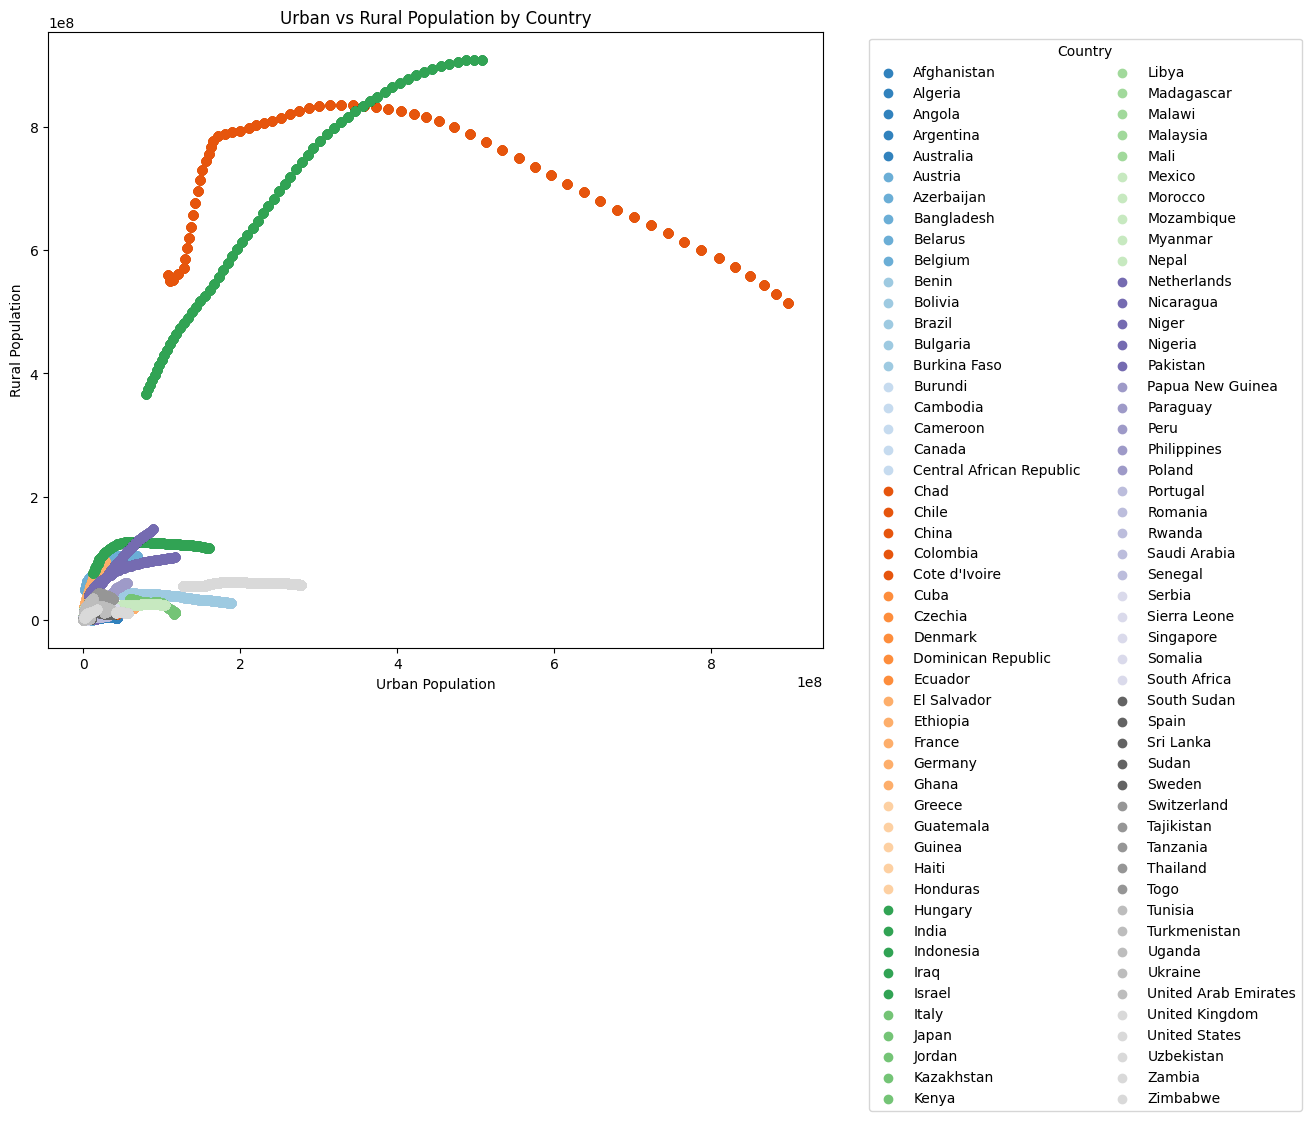

In [794]:
import matplotlib.pyplot as plt

urban_population = aggregated_df['Urban Population']
rural_population = aggregated_df['Rural Population']
countries = aggregated_df['Entity']

unique_countries = countries.unique()

colors = plt.cm.tab20c(np.linspace(0, 1, len(unique_countries)))

fig, ax = plt.subplots(figsize=(10, 8))
for country, color in zip(unique_countries, colors):
    country_indices = countries[countries == country].index
    ax.scatter(urban_population[country_indices], rural_population[country_indices], label=country, color=color)

ax.set_xlabel('Urban Population')
ax.set_ylabel('Rural Population')
ax.set_title('Urban vs Rural Population by Country')
ax.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2)  # Set ncol to 2 for a better layout

plt.show()


In [747]:
corr_df = aggregated_df.drop(['Entity', 'Code'], axis=1)
correlation_matrix = corr_df.corr()

<ipython-input-747-1829e1ed34b6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = corr_df.corr()


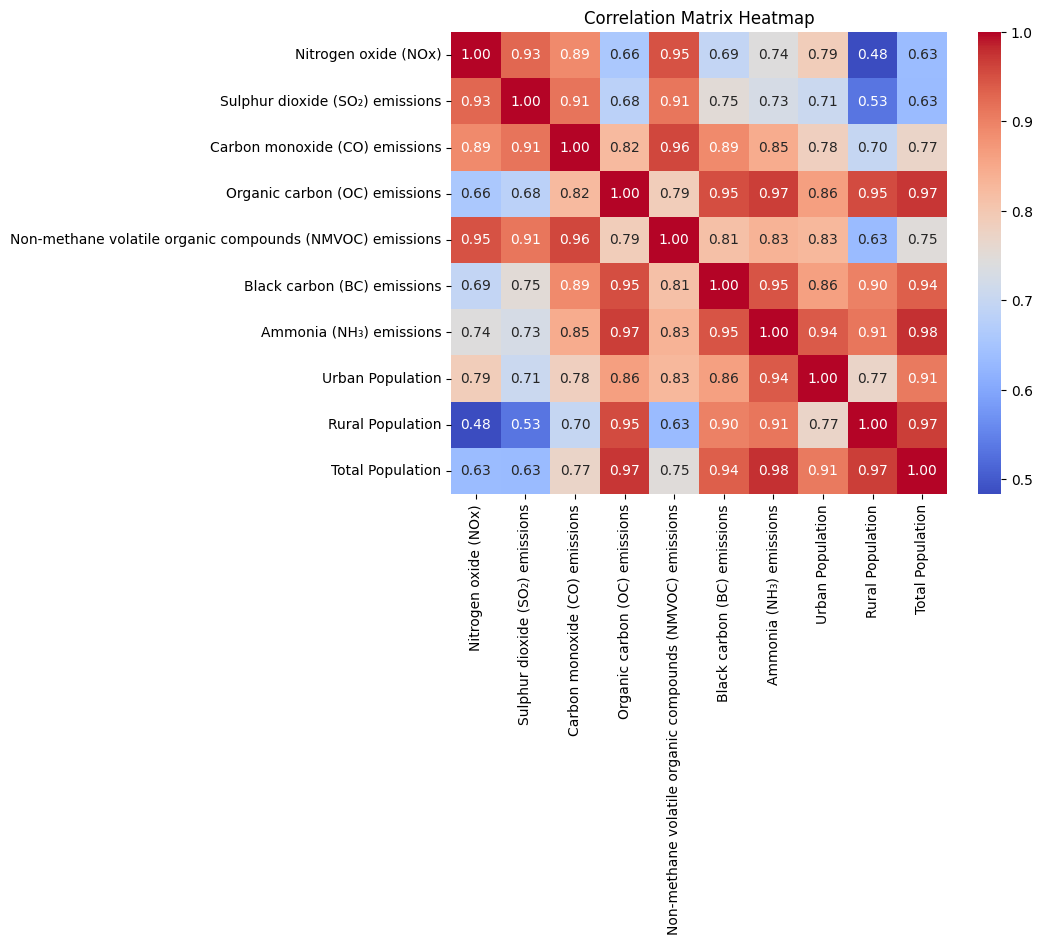

In [748]:
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

#Principal Component Analysis

In [749]:
list(aggregated_df.columns)

['Entity',
 'Code',
 'Year',
 'Nitrogen oxide (NOx)',
 'Sulphur dioxide (SO₂) emissions',
 'Carbon monoxide (CO) emissions',
 'Organic carbon (OC) emissions',
 'Non-methane volatile organic compounds (NMVOC) emissions',
 'Black carbon (BC) emissions',
 'Ammonia (NH₃) emissions',
 'Urban Population',
 'Rural Population',
 'Total Population']

In [750]:

aggregated_df.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            11267, 11268, 11269, 11270, 11271, 11272, 11273, 11274, 11275,
            11276],
           dtype='int64', length=6300)

In [751]:
aggregated_df.set_index('Code', inplace=True)


In [752]:
columns_for_scaling = ['Nitrogen oxide (NOx)',
                       'Sulphur dioxide (SO₂) emissions',
                       'Carbon monoxide (CO) emissions',
                       'Organic carbon (OC) emissions',
                       'Non-methane volatile organic compounds (NMVOC) emissions',
                       'Black carbon (BC) emissions',
                       'Ammonia (NH₃) emissions',
                       'Urban Population',
                       'Rural Population',
                       'Total Population']

data_for_scaling = aggregated_df[columns_for_scaling]

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_for_scaling)

pca = PCA()
pca_out = pca.fit_transform(data_scaled)

In [753]:
pca = PCA()
pca_out = pca.fit_transform(data_scaled)

In [754]:
#final_merged_df.mean(axis=0)

In [755]:
pd.DataFrame({'Center': scaler.mean_
                   , 'Scale': scaler.scale_}
                , index=data_for_scaling.columns)

,Center,Scale
Nitrogen oxide (NOx),7.401193e+05,2.616274e+06
Sulphur dioxide (SO₂) emissions,8.838860e+05,2.845522e+06
Carbon monoxide (CO) emissions,4.641221e+06,1.947135e+07
Organic carbon (OC) emissions,9.734539e+04,2.768452e+05
Non-methane volatile organic compounds (NMVOC) emissions,9.874364e+05,3.068019e+06
Black carbon (BC) emissions,4.281386e+04,1.450012e+05
Ammonia (NH₃) emissions,3.977558e+05,1.237218e+06
Urban Population,2.106300e+07,5.921707e+07
Rural Population,2.617943e+07,9.859008e+07
Total Population,4.724243e+07,1.491303e+08


In [756]:
print("Number of Principal Components:", pca.n_components_)

Number of Principal Components: 10


In [757]:
pd.DataFrame(pca.components_.T
                  , index=data_for_scaling.columns
                  , columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'])

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
Nitrogen oxide (NOx),0.291509,0.471876,0.270905,-0.148467,-0.244109,-0.352596,-0.556249,-0.266809,0.180030,0.000000e+00
Sulphur dioxide (SO₂) emissions,0.292245,0.438684,-0.279940,-0.668343,0.286654,0.203773,0.242473,0.097800,-0.071055,1.948788e-16
Carbon monoxide (CO) emissions,0.322644,0.244584,-0.373491,0.462540,0.047952,-0.300558,-0.041282,0.186718,-0.594506,-2.468901e-16
Organic carbon (OC) emissions,0.327470,-0.256739,-0.137220,-0.022197,-0.255984,0.682328,-0.418871,-0.189571,-0.255024,5.127110e-16
Non-methane volatile organic compounds (NMVOC) emissions,0.318389,0.321705,0.026496,0.377284,-0.426306,0.262230,0.517734,-0.058731,0.360680,4.093984e-16
Black carbon (BC) emissions,0.330459,-0.154628,-0.274412,0.277295,0.621398,-0.011311,-0.147013,-0.263786,0.487066,7.683746e-17
Ammonia (NH₃) emissions,0.336048,-0.171163,0.179327,-0.020809,-0.020106,0.011495,-0.198743,0.848327,0.255913,-3.404961e-15
Urban Population,0.319109,-0.060799,0.710973,0.061698,0.343496,0.071925,0.211622,-0.135283,-0.316327,-3.144399e-01
Rural Population,0.297363,-0.444539,-0.250220,-0.265590,-0.314668,-0.389431,0.190977,-0.132343,0.045731,-5.235087e-01
Total Population,0.323299,-0.318027,0.116895,-0.151082,-0.071631,-0.228893,0.210286,-0.141211,-0.095375,7.918751e-01


In [758]:
pca_out.shape

(6300, 10)

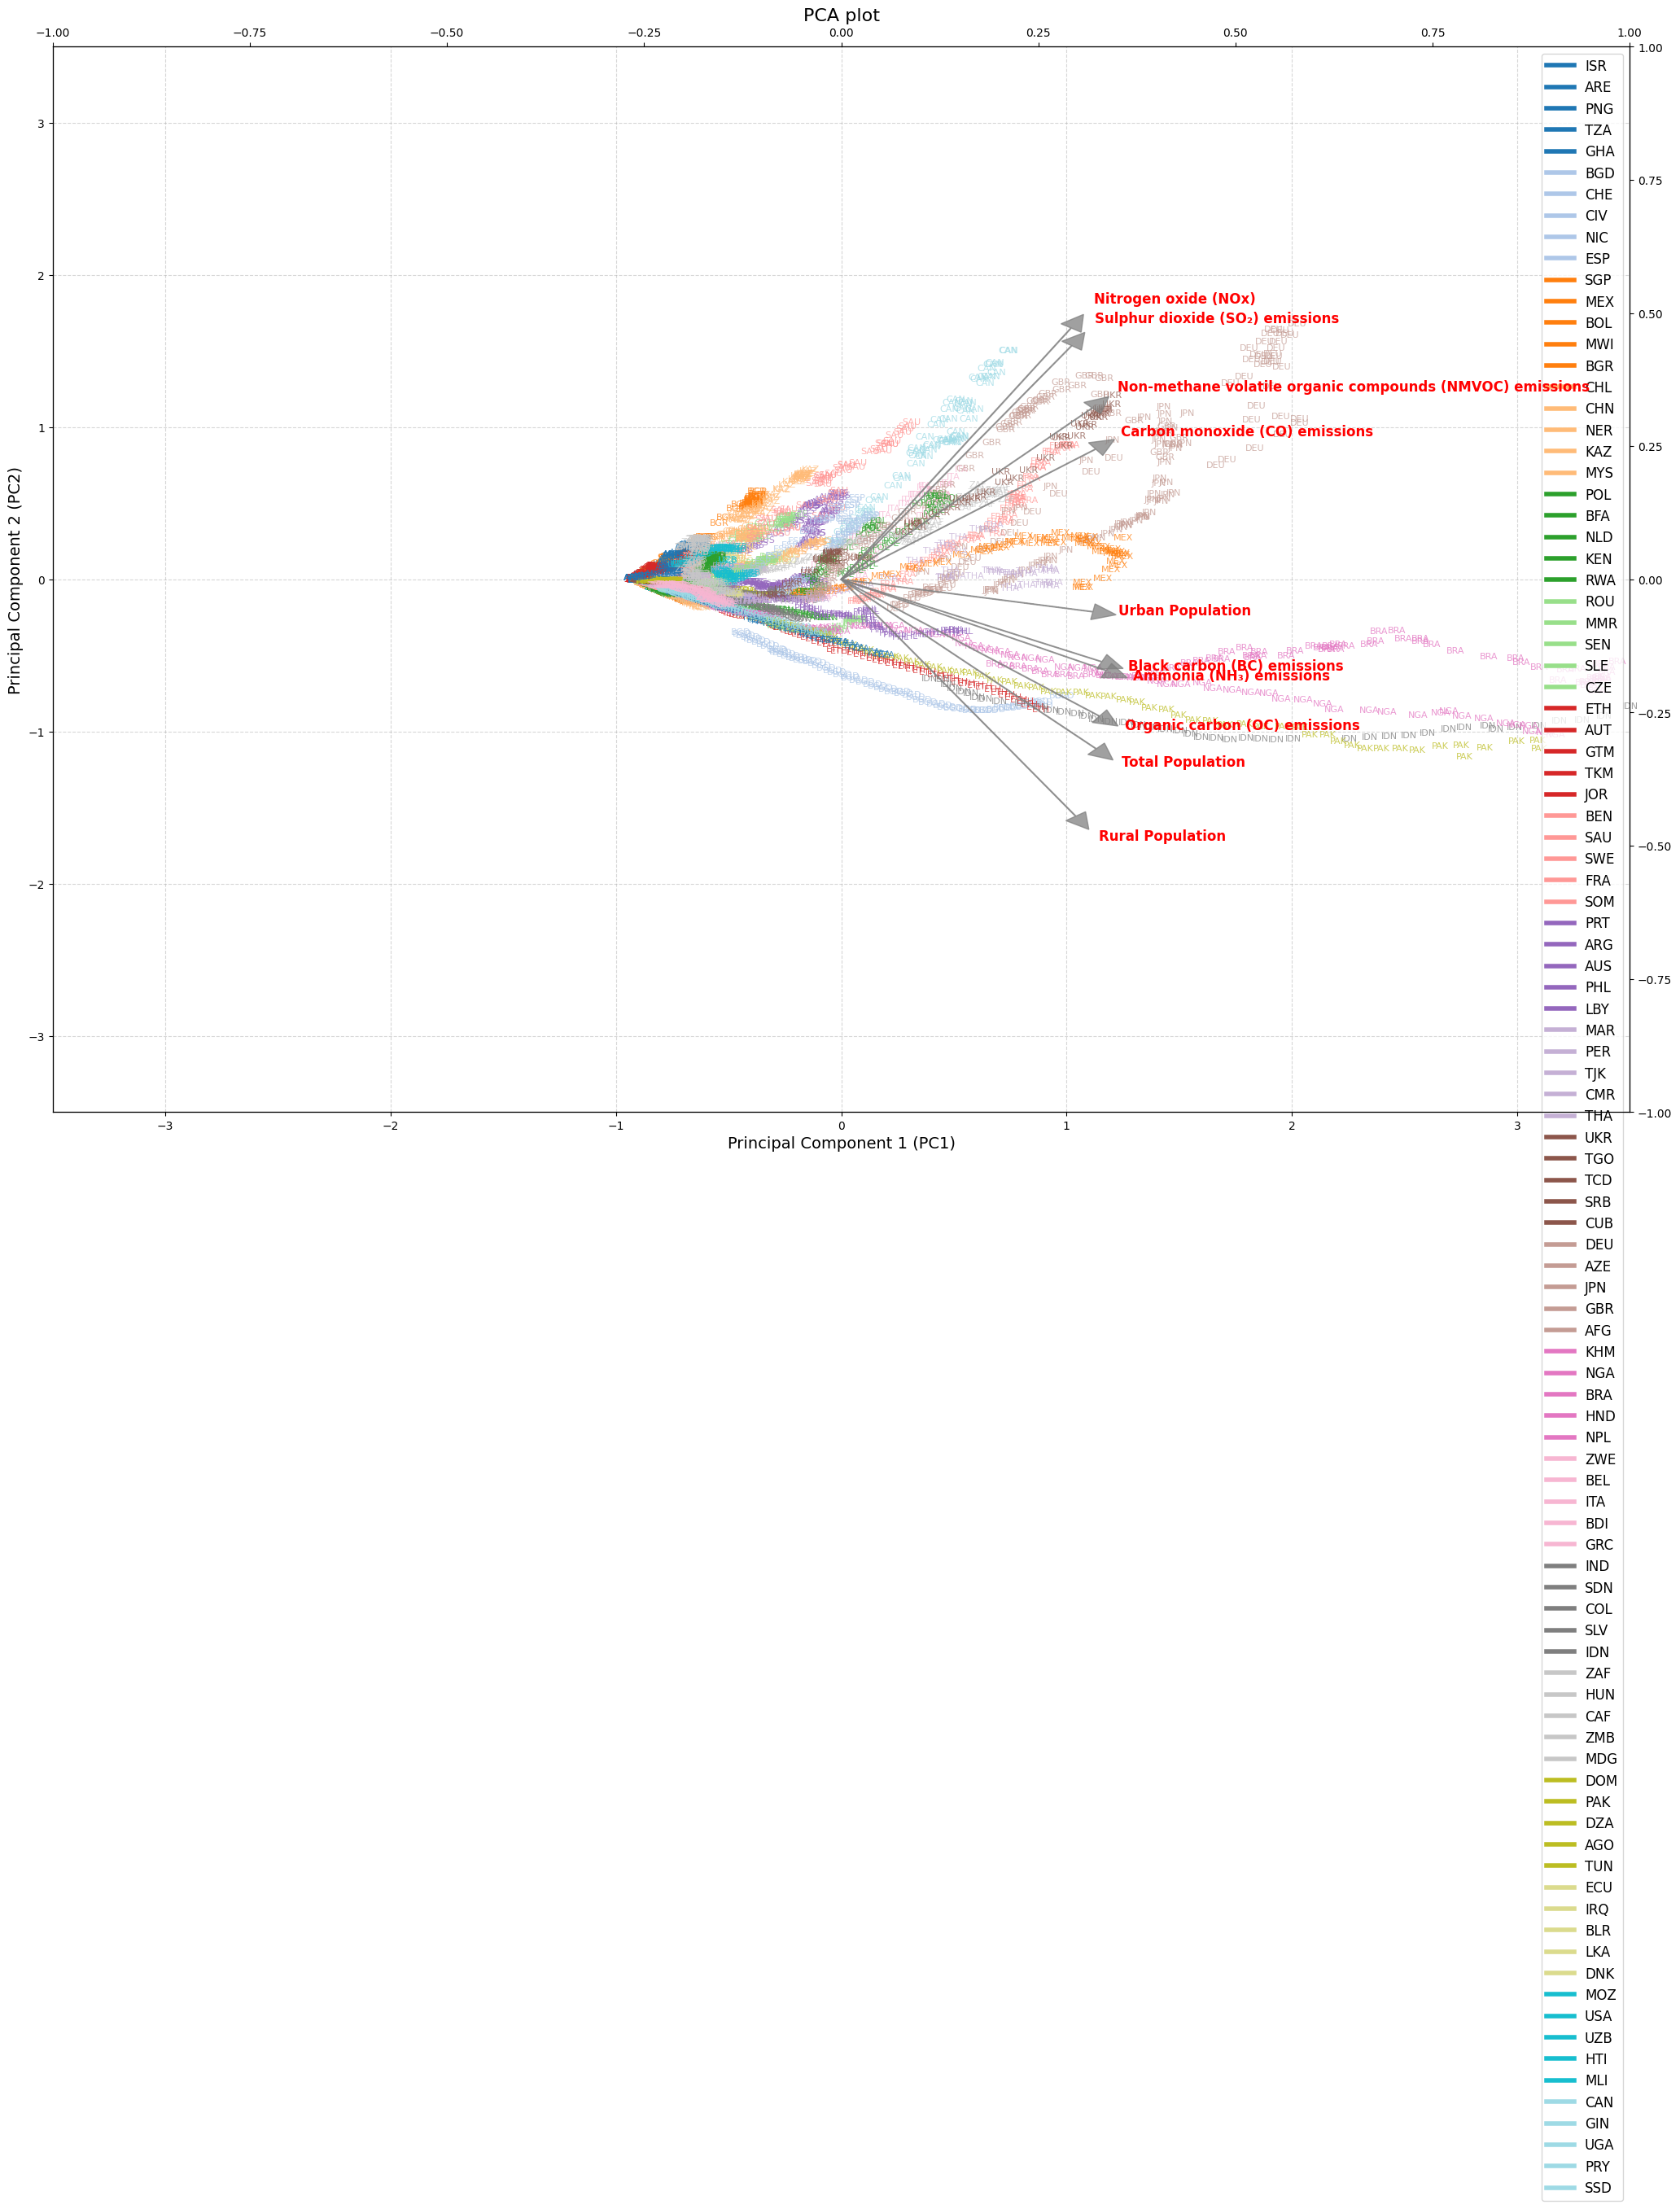

In [759]:
fig, ax1 = plt.subplots(figsize=(25,17))

ax1.set_xlim(-3.5, 3.5)
ax1.set_ylim(-3.5, 3.5)

labels = data_for_scaling.index.to_list()
unique_labels = list(set(labels))
colors = plt.cm.tab20(np.linspace(0, 1, len(unique_labels)))
label_color_map = dict(zip(unique_labels, colors))

for i, label in enumerate(labels):
    ax1.annotate(label, (pca_out[i, 0], pca_out[i, 1]), fontsize=8, alpha=0.75, color=label_color_map[label])

ax2 = ax1.twinx().twiny()
ax2.set_ylim(-1, 1)
ax2.set_xlim(-1, 1)

for i, (comp, var) in enumerate(zip(pca.components_.T, data_for_scaling.columns)):
    ax2.arrow(0, 0, comp[0], comp[1], head_width=0.03, head_length=0.03, fc='gray', ec='gray', alpha=0.75)
    ax2.text(comp[0]*1.1, comp[1]*1.1, var, color='red', fontsize=12, weight='bold')

ax1.set_xlabel("Principal Component 1 (PC1)", fontsize=14)
ax1.set_ylabel("Principal Component 2 (PC2)", fontsize=14)

ax2.set_xlabel("")
ax2.set_ylabel("")

plt.title("PCA plot", fontsize=16)

ax1.grid(True, linestyle='--', alpha=0.5)

handles = [plt.Line2D([0], [0], color=label_color_map[label], lw=4) for label in unique_labels]
ax1.legend(handles, unique_labels, loc='best', fontsize=12)

plt.show()

In [760]:
pca.explained_variance_

array([8.39377982e+00, 1.13365609e+00, 2.58548212e-01, 8.21603765e-02,
       7.26615434e-02, 2.56981879e-02, 1.61812994e-02, 1.34437880e-02,
       5.45823109e-03, 1.26401292e-31])

In [761]:
pca.explained_variance_ratio_

array([8.39244748e-01, 1.13347615e-01, 2.58507173e-02, 8.21473351e-03,
       7.26500098e-03, 2.56941088e-03, 1.61787310e-03, 1.34416541e-03,
       5.45736470e-04, 1.26381229e-32])

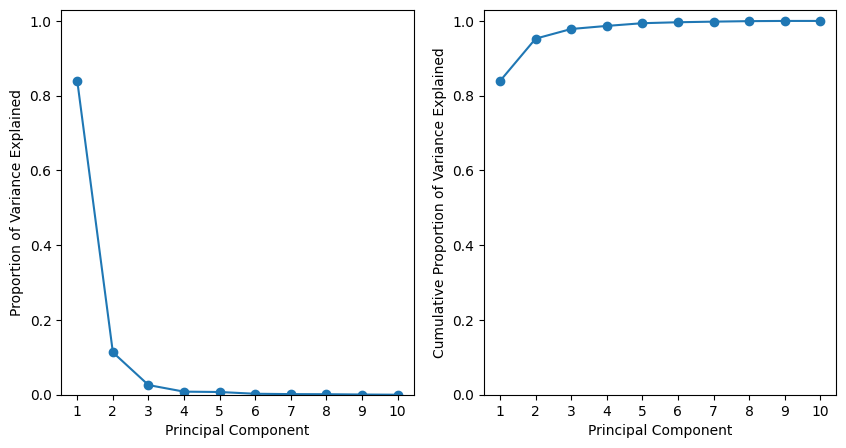

In [762]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].plot([1,2,3,4,5,6,7,8,9,10],pca.explained_variance_ratio_, marker='o')
ax[0].set_xlabel('Principal Component')
ax[0].set_ylabel('Proportion of Variance Explained')
ax[0].set_ylim(0, 1.03)
ax[0].set_xticks([1, 2, 3, 4, 5,6,7,8,9,10])

ax[1].plot([1,2,3,4,5,6,7,8,9,10],np.cumsum(pca.explained_variance_ratio_), marker='o')
ax[1].set_xlabel('Principal Component')
ax[1].set_ylabel('Cumulative Proportion of Variance Explained')
ax[1].set_ylim(0, 1.03)
ax[1].set_xticks([1, 2, 3, 4,5,6,7,8,9,10]);

# K-means Clustering

In [763]:
kmeans = KMeans(n_clusters=8, random_state=3, n_init=20)
clusters = kmeans.fit_predict(data_scaled)
aggregated_df['Cluster'] = clusters

<ipython-input-763-a3008e86a383>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_df['Cluster'] = clusters


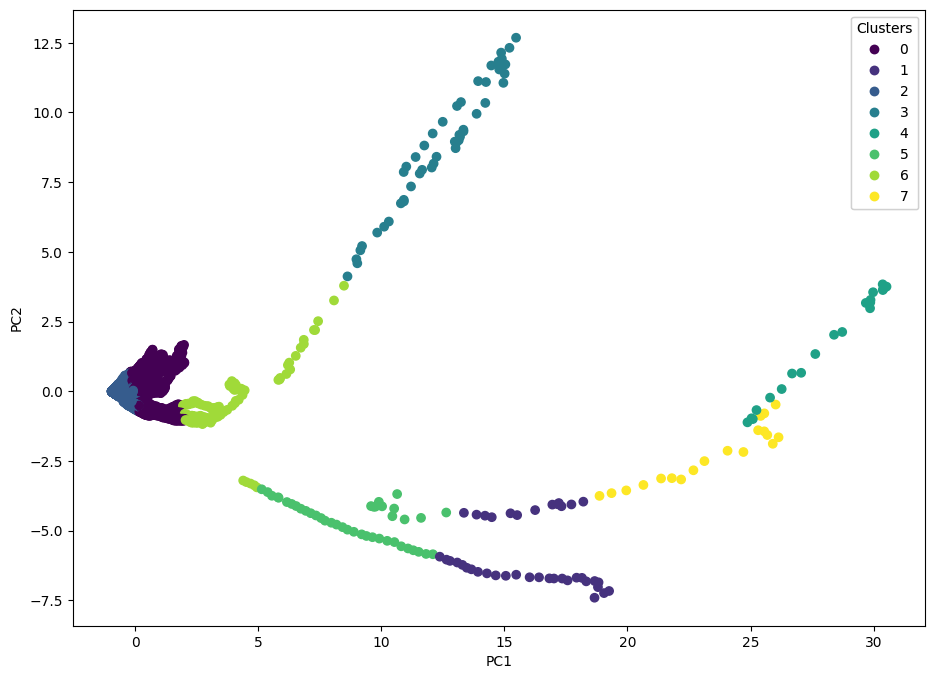

In [764]:
fig, ax = plt.subplots(figsize=(11, 8))
scatter = ax.scatter(pca_out[:, 0], pca_out[:, 1], c=clusters, cmap='viridis')
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
plt.show()

In [765]:
kmeans1 = KMeans(n_clusters=9, random_state=42, n_init=50)
clusters1 = kmeans1.fit_predict(data_scaled)
aggregated_df['Cluster'] = clusters1

<ipython-input-765-db18f04833af>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_df['Cluster'] = clusters1


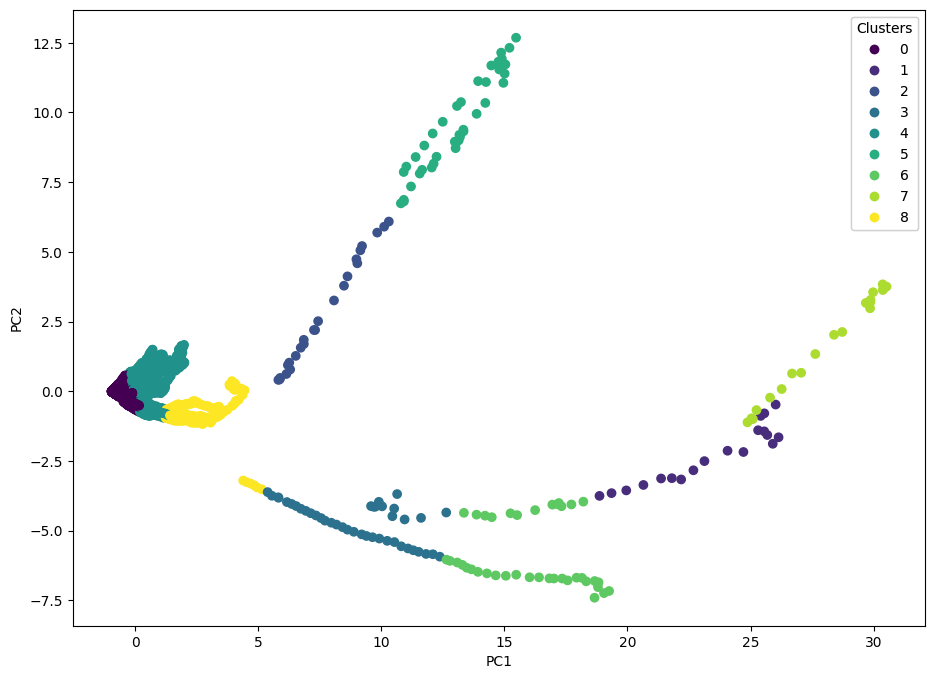

In [766]:
fig, ax = plt.subplots(figsize=(11, 8))

scatter = ax.scatter(pca_out[:, 0], pca_out[:, 1], c=clusters1, cmap='viridis')
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
plt.show()

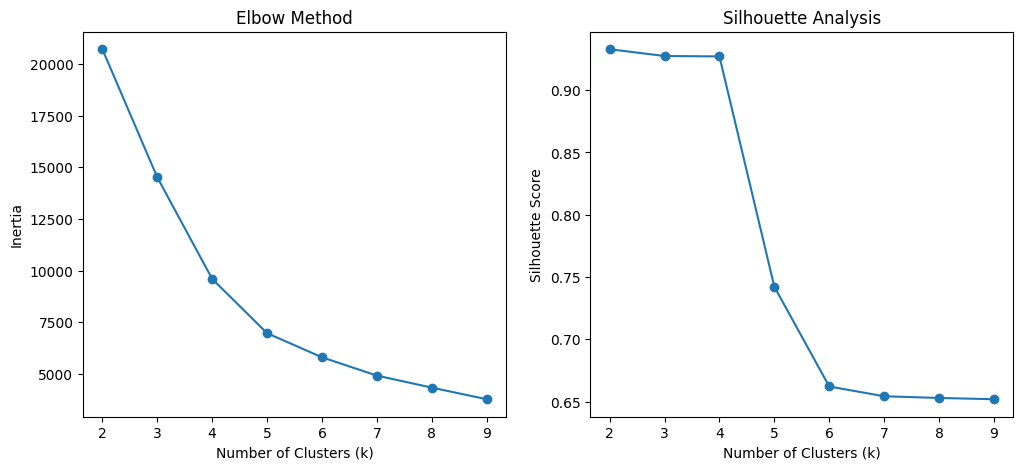

In [767]:
inertia = []
silhouette_scores = []
k_range = range(2, 10)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=20).fit(data_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, kmeans.labels_))

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')

plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Silhouette Analysis')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')

plt.show()

In [768]:
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=0, n_init = 20).fit(data_scaled)
aggregated_df['Cluster_KMeans'] = kmeans.labels_

<ipython-input-768-e5b958db0c10>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_df['Cluster_KMeans'] = kmeans.labels_


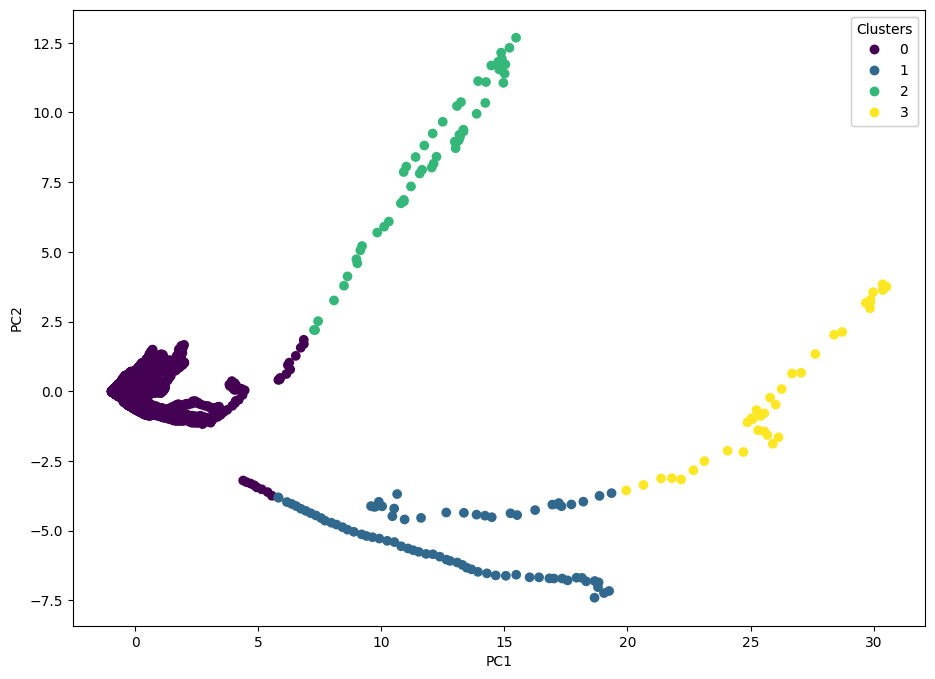

In [769]:
fig, ax = plt.subplots(figsize=(11, 8))
scatter = ax.scatter(pca_out[:, 0], pca_out[:, 1], c=kmeans.labels_, cmap='viridis')
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
plt.show()

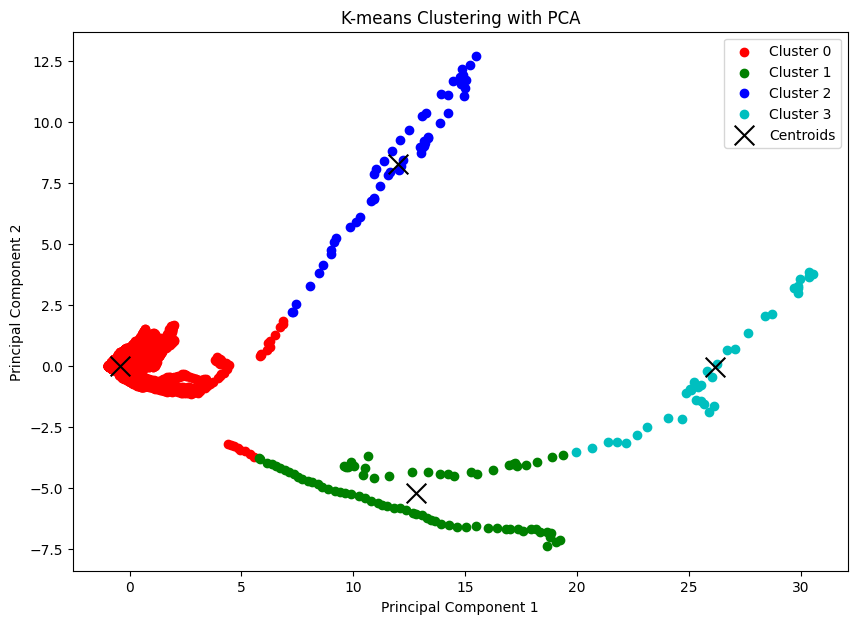

In [707]:
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(data_scaled)
plt.figure(figsize=(10, 7))

colors = ['r', 'g', 'b', 'c']
for i in range(optimal_k):
    cluster_points = pca_transformed[aggregated_df['Cluster_KMeans'] == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i}', c=colors[i])

centroids = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, c='black', label='Centroids')
plt.title('K-means Clustering with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


Streaming output truncated to the last 5000 lines.
Entity: Chad, Year: 2003
Entity: Chad, Year: 2004
Entity: Chad, Year: 2005
Entity: Chad, Year: 2006
Entity: Chad, Year: 2007
Entity: Chad, Year: 2008
Entity: Chad, Year: 2009
Entity: Chad, Year: 2010
Entity: Chad, Year: 2011
Entity: Chad, Year: 2012
Entity: Chad, Year: 2013
Entity: Chad, Year: 2014
Entity: Chad, Year: 2015
Entity: Chad, Year: 2016
Entity: Chad, Year: 2017
Entity: Chad, Year: 2018
Entity: Chad, Year: 2019
Entity: Chad, Year: 2020
Entity: Chad, Year: 2021
Entity: Chad, Year: 2022
Entity: Chile, Year: 1960
Entity: Chile, Year: 1961
Entity: Chile, Year: 1962
Entity: Chile, Year: 1963
Entity: Chile, Year: 1964
Entity: Chile, Year: 1965
Entity: Chile, Year: 1966
Entity: Chile, Year: 1967
Entity: Chile, Year: 1968
Entity: Chile, Year: 1969
Entity: Chile, Year: 1970
Entity: Chile, Year: 1971
Entity: Chile, Year: 1972
Entity: Chile, Year: 1973
Entity: Chile, Year: 1974
Entity: Chile, Year: 1975
Entity: Chile, Year: 1976
Entity:

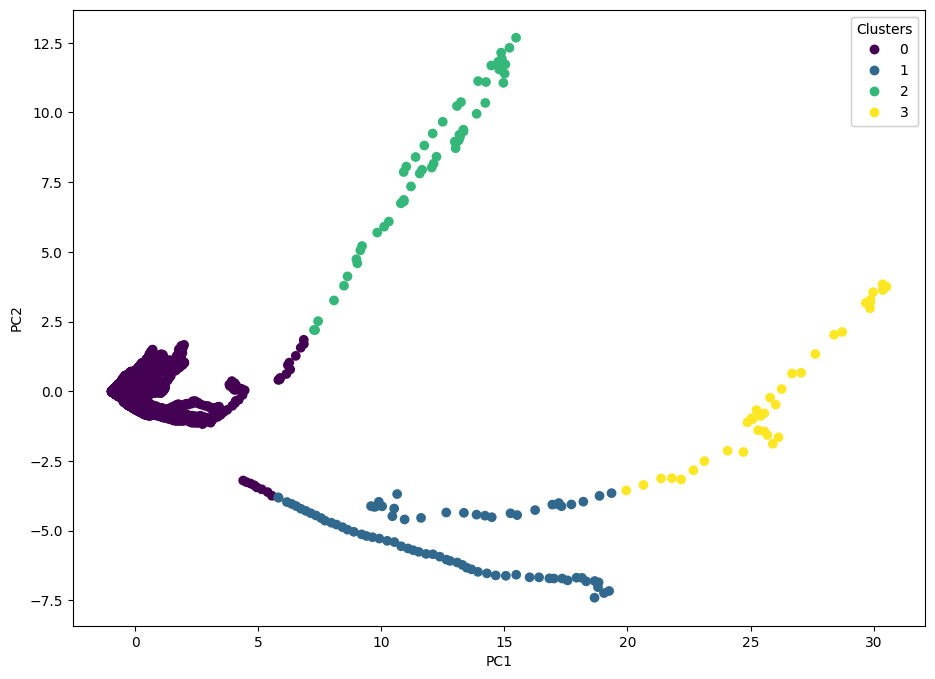

In [779]:

entities = aggregated_df['Entity'].values
years = aggregated_df['Year'].values

unique_labels = np.unique(kmeans.labels_)
for label in unique_labels:
    print(f"Cluster {label}:")
    indices = np.where(kmeans.labels_ == label)[0]
    cluster_info = [(entities[idx], years[idx]) for idx in indices if idx < len(entities) and idx < len(years)]
    for entity, year in cluster_info:
        print(f"Entity: {entity}, Year: {year}")

# Visualization
fig, ax = plt.subplots(figsize=(11, 8))
scatter = ax.scatter(pca_out[:, 0], pca_out[:, 1], c=kmeans.labels_, cmap='viridis')
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
plt.show()


Cluster 0:
Entity: Afghanistan, Count: 63
Entity: Algeria, Count: 63
Entity: Angola, Count: 63
Entity: Argentina, Count: 63
Entity: Australia, Count: 63
Entity: Austria, Count: 63
Entity: Azerbaijan, Count: 63
Entity: Bangladesh, Count: 63
Entity: Belarus, Count: 63
Entity: Belgium, Count: 63
Entity: Benin, Count: 63
Entity: Bolivia, Count: 63
Entity: Brazil, Count: 63
Entity: Bulgaria, Count: 63
Entity: Burkina Faso, Count: 63
Entity: Burundi, Count: 63
Entity: Cambodia, Count: 63
Entity: Cameroon, Count: 63
Entity: Canada, Count: 63
Entity: Central African Republic, Count: 63
Entity: Chad, Count: 63
Entity: Chile, Count: 63
Entity: Colombia, Count: 63
Entity: Cote d'Ivoire, Count: 63
Entity: Cuba, Count: 63
Entity: Czechia, Count: 63
Entity: Denmark, Count: 63
Entity: Dominican Republic, Count: 63
Entity: Ecuador, Count: 63
Entity: El Salvador, Count: 63
Entity: Ethiopia, Count: 63
Entity: France, Count: 63
Entity: Germany, Count: 63
Entity: Ghana, Count: 63
Entity: Greece, Count: 63

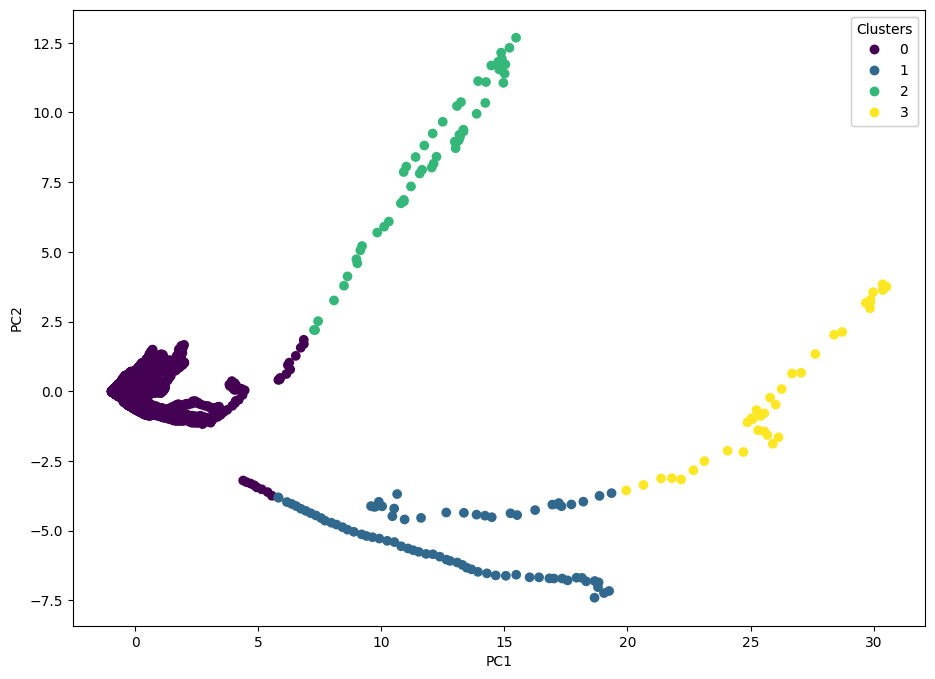

In [791]:
from collections import Counter

entities = aggregated_df['Entity'].values
years = aggregated_df['Year'].values

unique_labels = np.unique(kmeans.labels_)
for label in unique_labels:
    print(f"Cluster {label}:")
    indices = np.where(kmeans.labels_ == label)[0]
    cluster_entities = entities[indices]
    entity_counts = Counter(cluster_entities)
    for entity, count in entity_counts.items():
        print(f"Entity: {entity}, Count: {count}")

# Visualization
fig, ax = plt.subplots(figsize=(11, 8))
scatter = ax.scatter(pca_out[:, 0], pca_out[:, 1], c=kmeans.labels_, cmap='viridis')
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
plt.show()



In [623]:
print("Cluster centroids (in original feature space):")
print(scaler.inverse_transform(kmeans.cluster_centers_))
print("Number of points in each cluster:")
print(aggregated_df['Cluster_KMeans'].value_counts())


Cluster centroids (in original feature space):
[[4.05232305e+05 5.24398869e+05 1.89712288e+06 5.79115974e+04
  5.62060294e+05 2.32027764e+04 2.19441777e+05 1.36246430e+07
  1.28139786e+07 2.64386217e+07]
 [4.53513087e+06 5.92873011e+06 5.82153936e+07 1.67658115e+06
  8.65507189e+06 6.89073562e+05 6.84633775e+06 2.36764353e+08
  6.96498449e+08 9.33262802e+08]
 [2.12135107e+07 2.03460155e+07 1.18258571e+08 7.19409188e+05
  2.19527845e+07 3.10093828e+05 3.75728319e+06 1.84995751e+08
  5.83666262e+07 2.43362377e+08]
 [1.91413364e+07 2.20458645e+07 1.82309071e+08 2.29906821e+06
  2.52111884e+07 1.50147216e+06 1.11013918e+07 5.50814728e+08
  7.27817974e+08 1.27863270e+09]]
Number of points in each cluster:
0    6130
1      81
2      52
3      37
Name: Cluster_KMeans, dtype: int64


# SVD

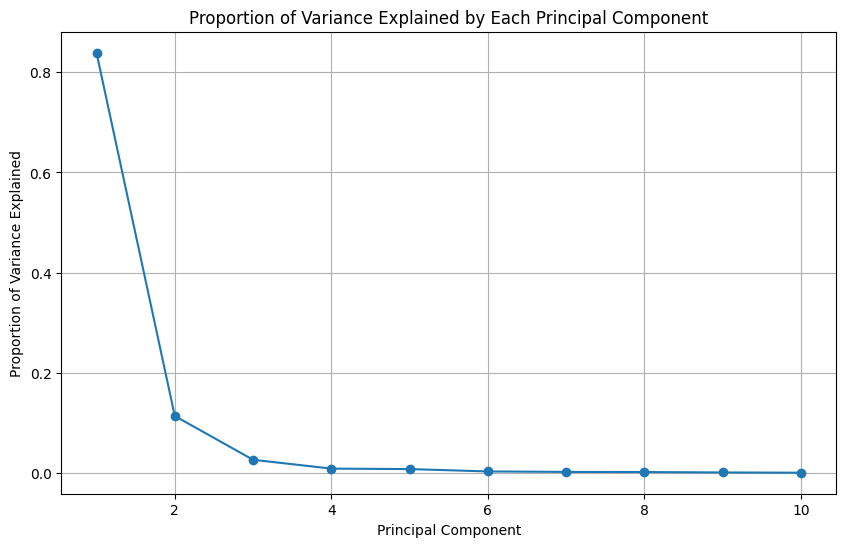

In [624]:
U, s, Vt = np.linalg.svd(data_scaled, full_matrices=False)
explained_variance_ratio = (s ** 2) / np.sum(s ** 2)
component_numbers = np.arange(1, len(explained_variance_ratio) + 1)
plt.figure(figsize=(10, 6))
plt.plot(component_numbers, explained_variance_ratio, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.title('Proportion of Variance Explained by Each Principal Component')
plt.grid(True)
plt.show()

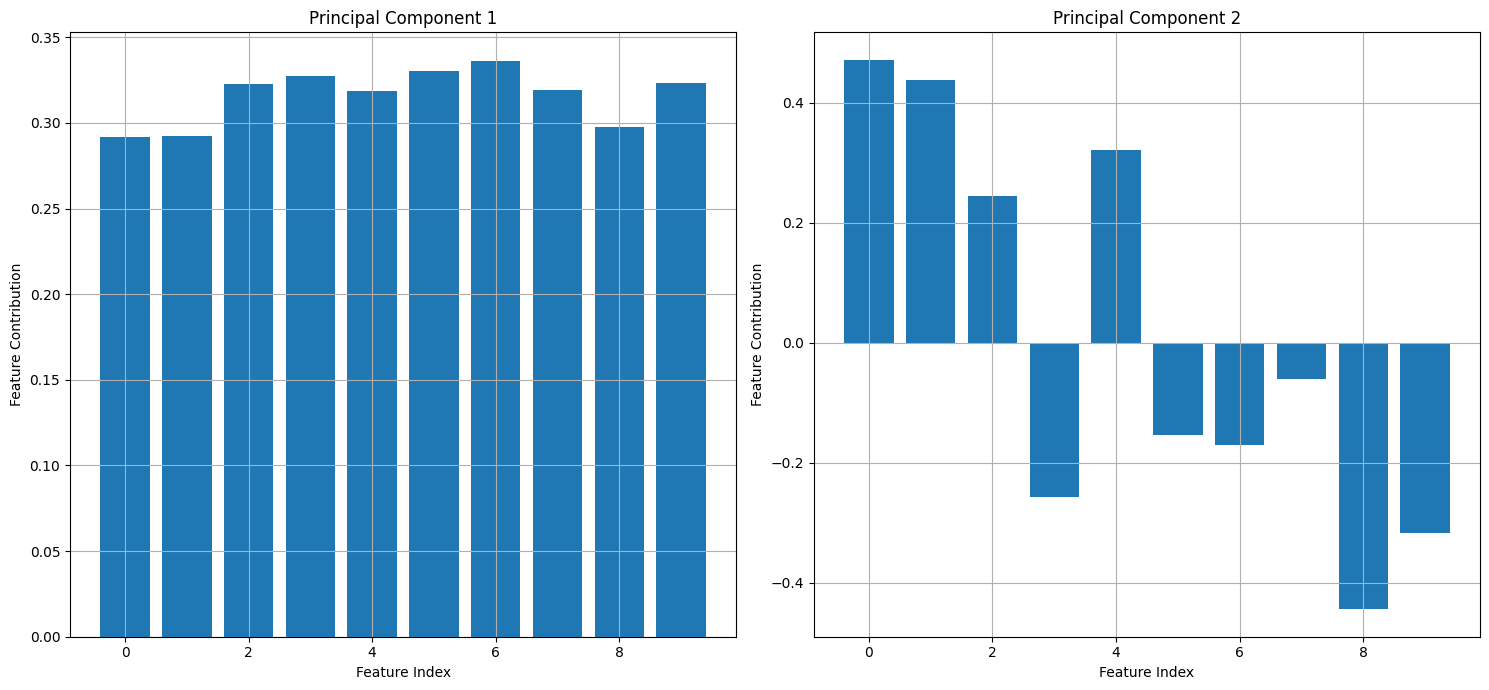

In [625]:
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.bar(range(len(Vt[0])), Vt[0])
plt.title('Principal Component 1')
plt.xlabel('Feature Index')
plt.ylabel('Feature Contribution')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.bar(range(len(Vt[1])), Vt[1])
plt.title('Principal Component 2')
plt.xlabel('Feature Index')
plt.ylabel('Feature Contribution')
plt.grid(True)

plt.tight_layout()
plt.show()

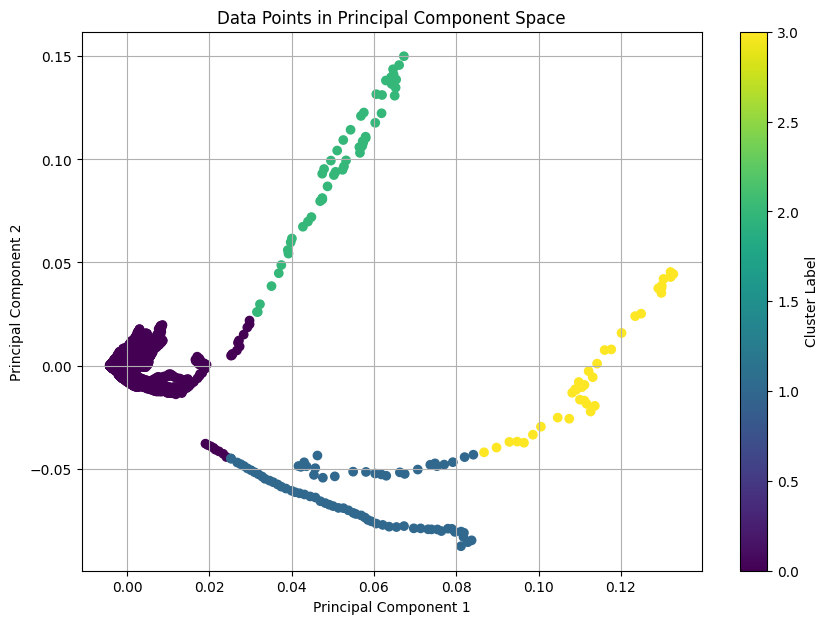

In [626]:
plt.figure(figsize=(10, 7))
plt.scatter(U[:, 0], U[:, 1], c=kmeans.labels_, cmap='viridis', marker='o')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Data Points in Principal Component Space')
plt.grid(True)
plt.colorbar(label='Cluster Label')
plt.show()

# Hierarchical Clustering


In [627]:
#pip install ISLP

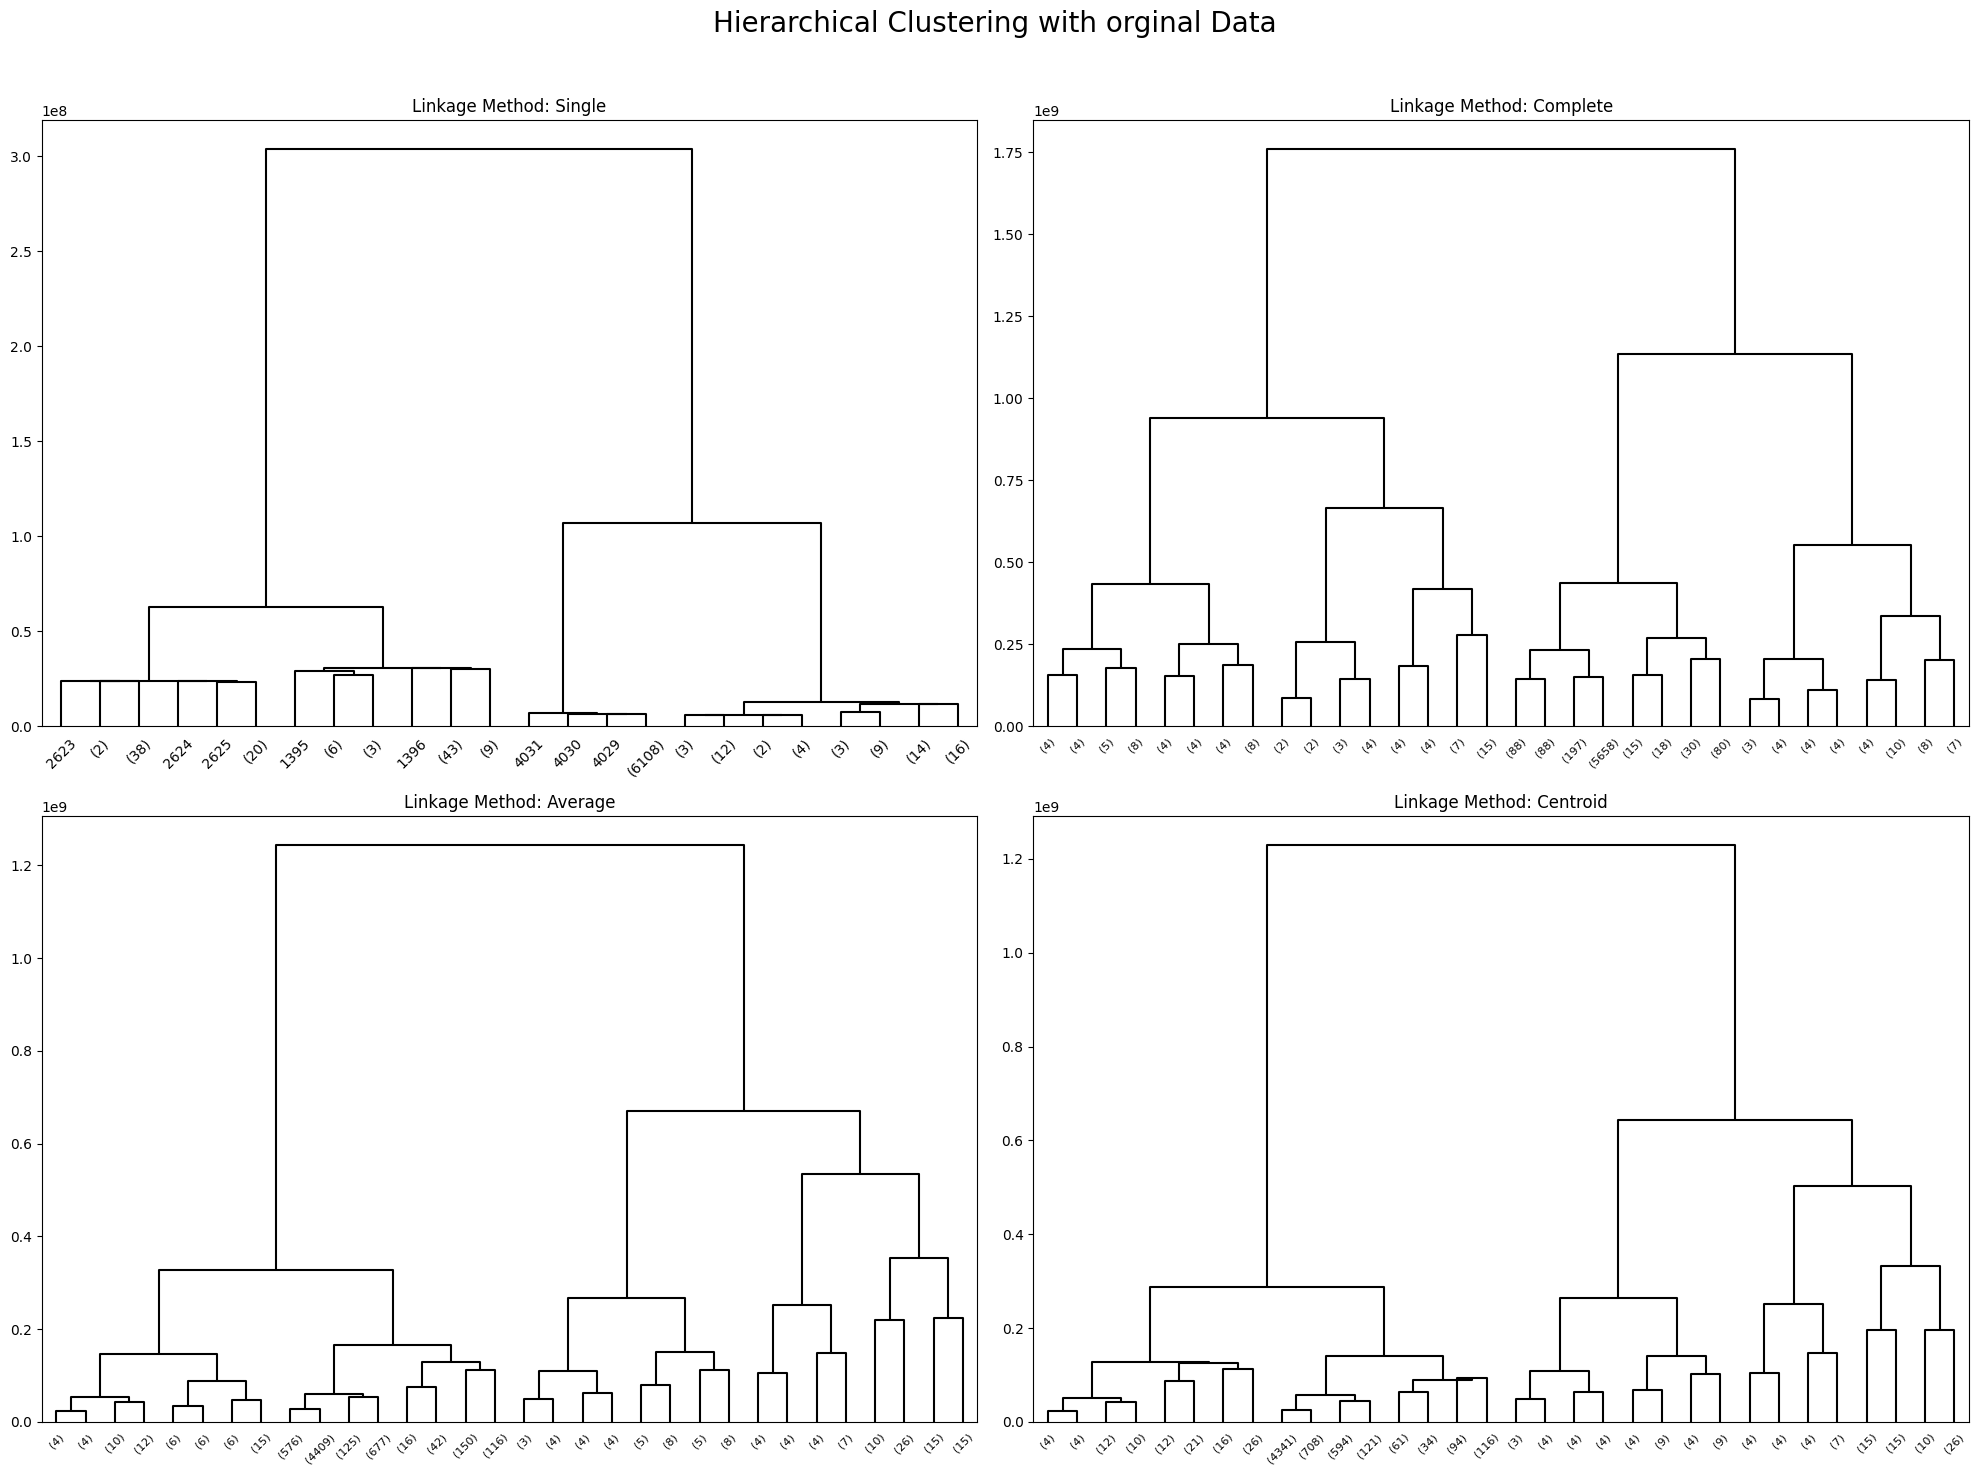

In [644]:
def dendrograms(data_for_scaling, axes, linkage_methods, title):
    for method, ax in zip(linkage_methods, axes.flatten()[:-1]):
        hc_agglo = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage=method)
        hc_agglo.fit(data_for_scaling)
        Z = linkage(data_for_scaling, method=method)
        dendrogram(Z, ax=ax, truncate_mode='level',p=4, color_threshold=4, above_threshold_color='black')
        ax.set_title(f'Linkage Method: {method.capitalize()}')
    plt.suptitle(title, fontsize=20)
    plt.tight_layout(rect=[0, 0, 1, 0.96])

def dendrogram_cent(data_for_scaling, ax):
    Z = linkage(data_for_scaling, method='centroid')
    dendrogram(Z, ax=ax, truncate_mode='level',p=4, color_threshold=4, above_threshold_color='black')
    ax.set_title('Linkage Method: Centroid')

def main(aggregated_df):
    linkage_methods = ['single', 'complete', 'average']
    np.random.seed(0)
    fig, axes = plt.subplots(2, 2, figsize=(20, 15))
    dendrograms(data_for_scaling, axes, linkage_methods, "Hierarchical Clustering with orginal Data")
    dendrogram_cent(data_for_scaling, axes.flatten()[-1])
    plt.show()

if __name__ == "__main__":
    main(data_for_scaling)


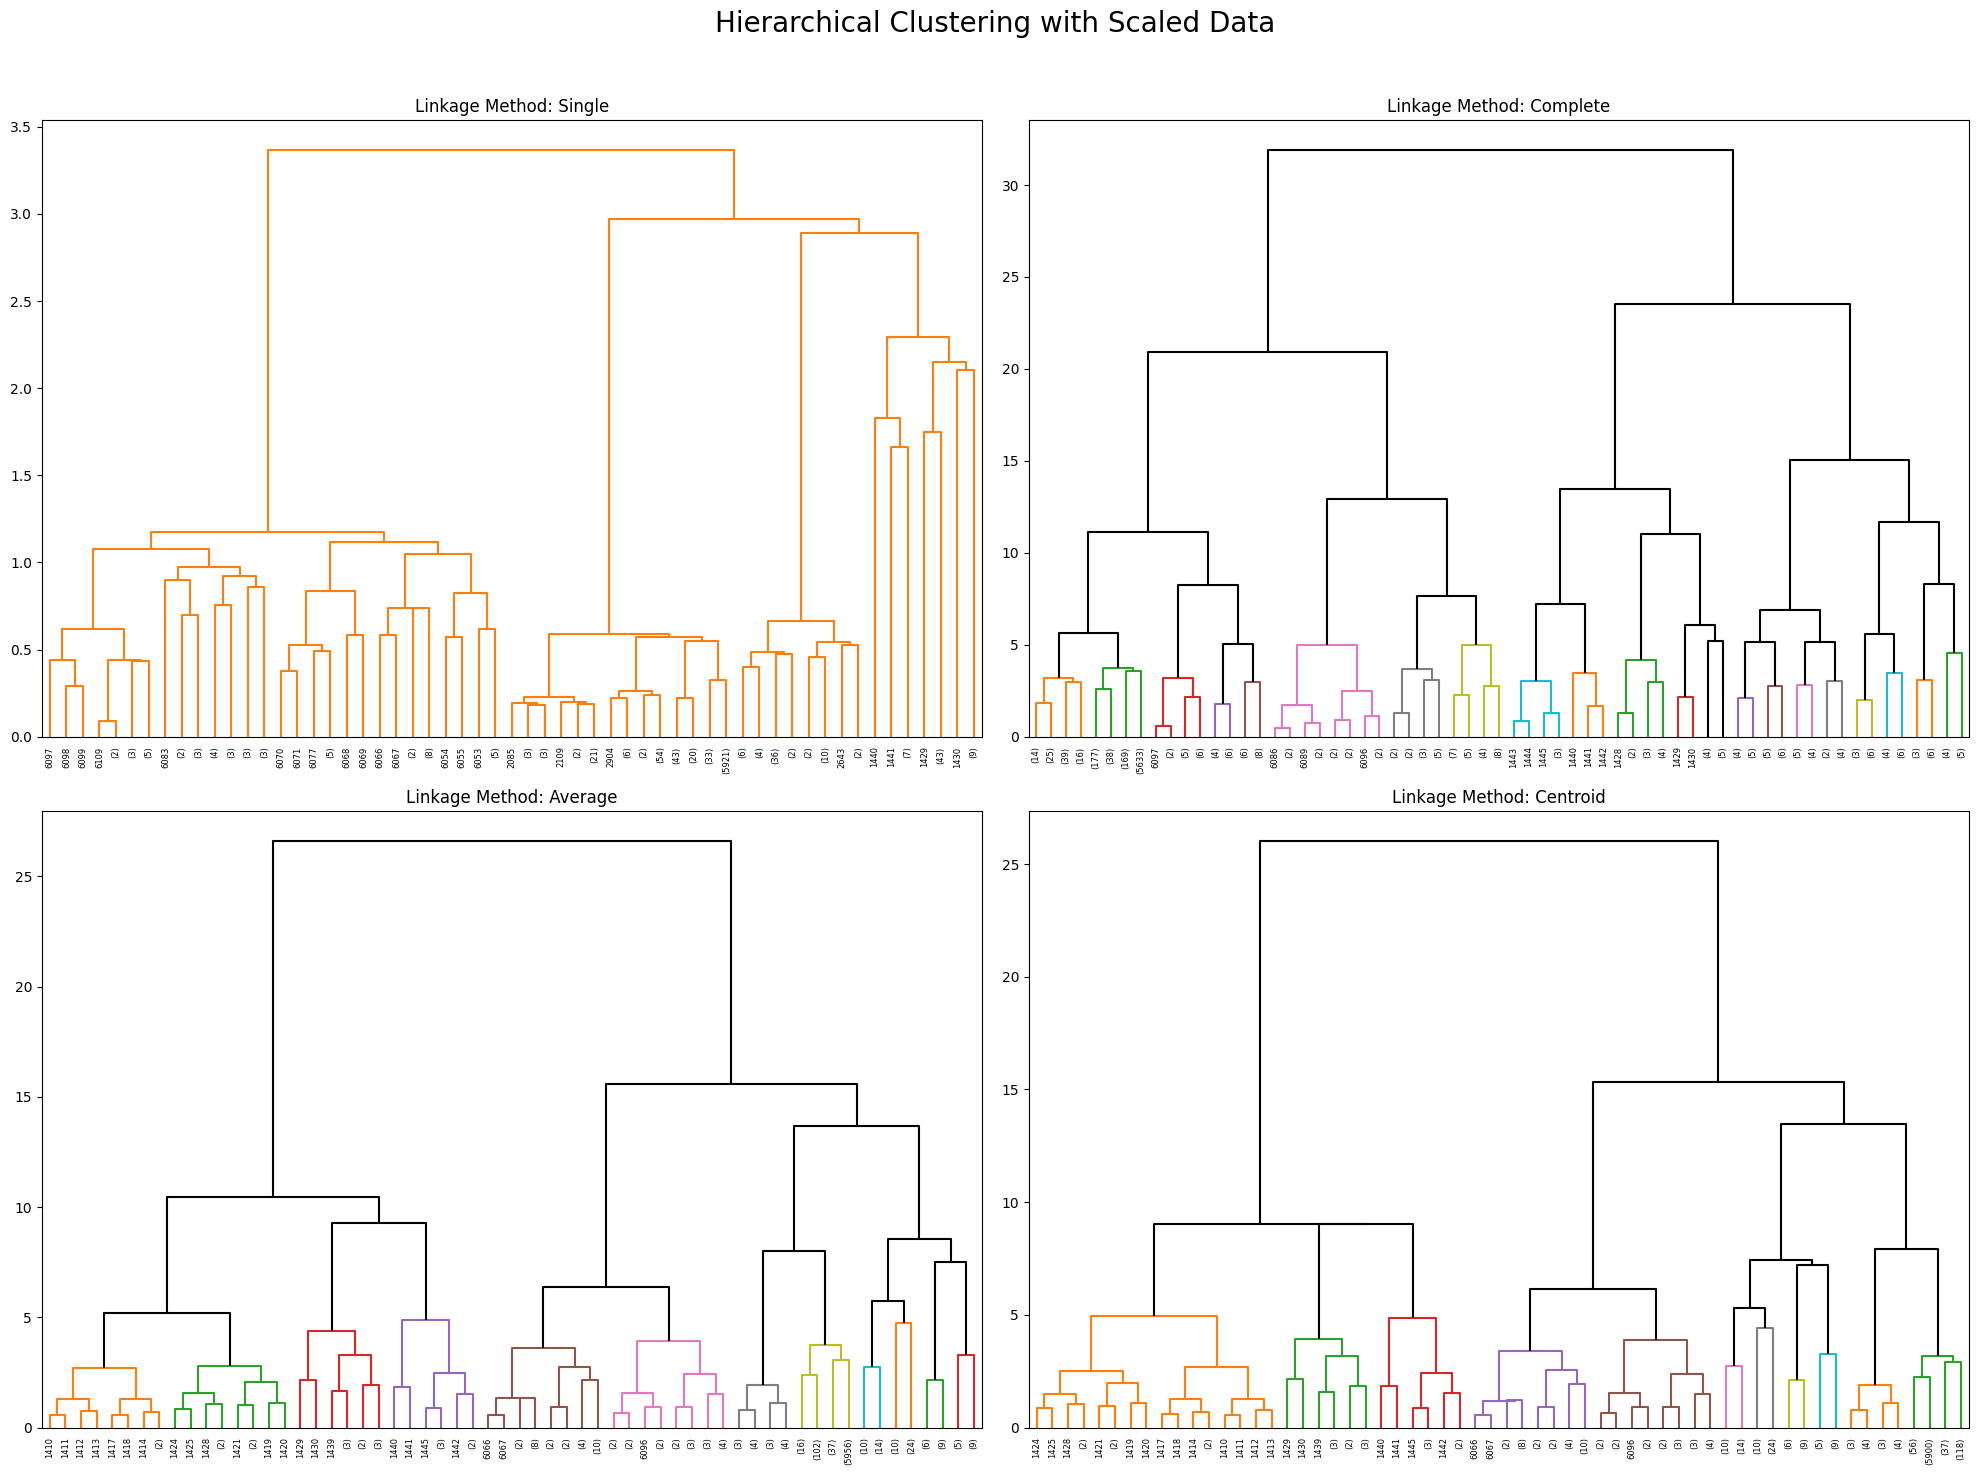

In [640]:
def dendrograms(data_scaled, axes, linkage_methods, title):
    for method, ax in zip(linkage_methods, axes.flatten()[:-1]):
        hc_agglo = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage=method)
        hc_agglo.fit(data_scaled)
        Z = linkage(data_scaled, method=method)
        dendrogram(Z, ax=ax, truncate_mode='level', p=4, color_threshold=4, above_threshold_color='black')
        ax.set_title(f'Linkage Method: {method.capitalize()}')
    plt.suptitle(title, fontsize=20)
    plt.tight_layout(rect=[0, 0, 1, 0.96])

def dendrogram_cent(data_scaled, ax):
    Z = linkage(data_scaled, method='centroid')
    dendrogram(Z, ax=ax, truncate_mode='level', p=4, color_threshold=4, above_threshold_color='black')
    ax.set_title('Linkage Method: Centroid')

def main(data_scaled):
    linkage_methods = ['single', 'complete', 'average']
    np.random.seed(0)
    fig, axes = plt.subplots(2, 2, figsize=(20, 15))
    dendrograms(data_scaled, axes, linkage_methods, "Hierarchical Clustering with Scaled Data")
    dendrogram_cent(data_scaled, axes.flatten()[-1])
    plt.show()

if __name__ == "__main__":
    main(data_scaled)
